# ECE 219 Project 1
Group Members: Zan Xie (UID: 205364923), Joseph Gong (UID: 606073799), Anuk Fernando (UID: 805423707)


mount google drive and load the data file <br> input file: Project1-ClassificationDataset.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/Shareddrives/ECE219/Project1-ClassificationDataset.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df['full_text'])

0       'Personalize Your NBA App Experience for the '...
1       'Mike Will attends the Pre-GRAMMY Gala and GRA...
2       'The Golden State Warriors are struggling to f...
3       'On Nov. 28, the NBA and Nike will collaborate...
4       'The NBA announced additions and innovations t...
                              ...                        
3471    'The Virginia Department of Forestry continues...
3472    'State Alabama Alaska Arizona Arkansas Califor...
3473    'Chengdu showcases technological strength at h...
3474    'Bluefield, WV (24701)\n\nToday\n\nPartly clou...
3475    'The Search for Extraterrestrial Intelligence ...
Name: full_text, Length: 3476, dtype: object


#Getting Farmiliar with the Dataset

##Q1
(1) Overview: There are 3476 rows and 8 columns in the dataset<br>(2) Histogram: plots showned below.<br>(3)Interpret Plots: The majority have less than 10 thousand Alpha-numeric characters in a news text, and more than half of the news have characters less than 3 thousand. In the dataset, the number of news are evenly distribute to 10 leaf catagories. Regarding of root catagories, the number is evenly distributed. Expect that drought catagory has less than others.

In [ ]:
display(df.head())
print("row: ", df.shape[0], " and columns: ", df.shape[1])

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,'Personalize Your NBA App Experience for the '...,'Personalize Your NBA App Experience for the '...,"['original', 'content', 'live', 'slate', 'game...",NaN,['Official Release'],https://www.nba.com/news/nba-app-new-features-...,basketball,sports
1,'Mike Will attends the Pre-GRAMMY Gala and GRA...,'Mike WiLL Made-It has secured a partnership w...,"['lead', 'espn', 'nbas', 'madeit', 'nba', 'lat...",2023-10-18 16:22:29+00:00,['Marc Griffin'],https://www.vibe.com/news/entertainment/mike-w...,basketball,sports
2,'The Golden State Warriors are struggling to f...,'The Golden State Warriors are struggling to f...,"['insider', 'york', 'thing', 'nbc', 'tag', 'nb...",NaN,[],https://www.nbcnewyork.com/tag/featured-nba/,basketball,sports
3,"'On Nov. 28, the NBA and Nike will collaborate...","'On Nov. 28, the NBA and Nike will collaborate...","['watch', 'telecast', 'ultimate', 'membership'...",NaN,['Official Release'],https://www.nba.com/news/watch-nba-games-ultim...,basketball,sports
4,'The NBA announced additions and innovations t...,'The NBA announced additions and innovations t...,"['experience', 'bring', 'media', 'crennan', 'n...",2023-10-17 12:00:17+00:00,"['Chris Novak', 'About Chris Novak']",https://awfulannouncing.com/tech/nba-app-2023-...,basketball,sports


row:  3476  and columns:  8


Text(0, 0.5, 'Frequency')

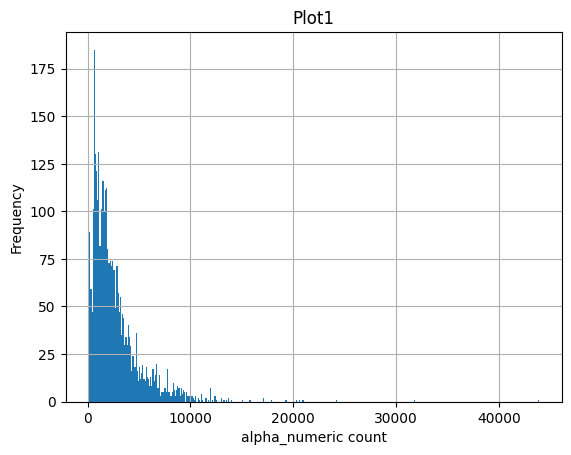

In [ ]:
# number of alpha-numeric plot
num_char = df['full_text'].str.len() - df['full_text'].str.count('\s')

# plot histogram with bins = 400 (roughly interval = 100)
alph_plot = num_char.hist(bins=400)
alph_plot.set_title("Plot1")
alph_plot.set_xlabel("alpha_numeric count")
alph_plot.set_ylabel("Frequency")

In [ ]:
print('Minimum: ', num_char.min(), '\n Maximum: ', num_char.max())

Minimum:  46 
 Maximum:  43922


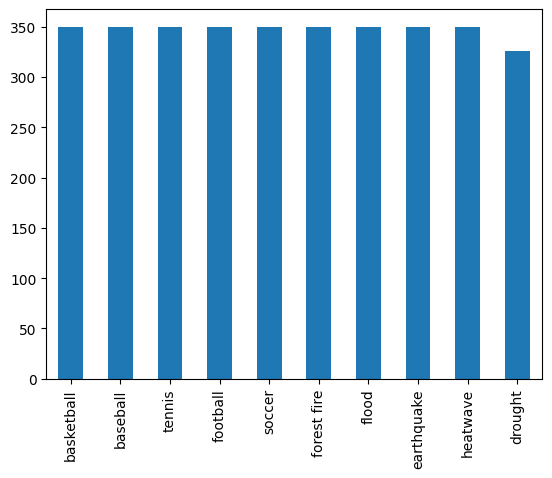

In [ ]:
# leaf_label plot
import matplotlib.pyplot as plt
df['leaf_label'].value_counts().plot.bar()
plt.show()

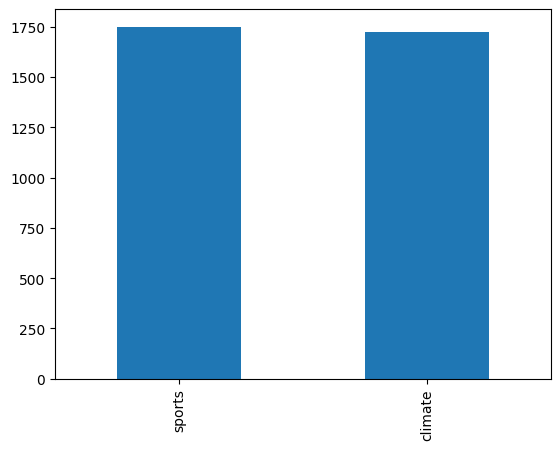

In [ ]:
# root_label plot
import matplotlib.pyplot as plt
df['root_label'].value_counts().plot.bar()
plt.show()

# Binary Classification

## Q2 Splitting the entire dataset into training and testing data
The size of the training set is 2780.<br>The size of the testing set is 696.

In [ ]:
# random seed for consistency
import numpy as np
import random
np.random.seed(42)
random.seed(42)

In [ ]:
# seperate training and testing sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)

print (train)
print (test)
print (train.shape[0])
print (test.shape[0])

                                              full_text root_label
2677  'While the four-day Aftershock's economic impa...    climate
1204  'CBS Essentials is created independently of th...     sports
2955  'Moderate-to-severe drought will likely contin...    climate
2266  'Colleen Flood, the longtime co-owner of The F...    climate
611   'WASHINGTON TRAFFIC MAY HAVE SAVED HIS LIFE. Y...     sports
...                                                 ...        ...
1095  '(Photo by Justin Casterline/Getty Images)\n\n...     sports
1130  'COOKEVILLE, Tenn. (WKRN) — The Golden Eagles ...     sports
1294  'FanDuel Sportsbook has launched an exclusive ...     sports
860   'Hunting stories are a Maine tradition, just l...     sports
3174  'By Lewis Jackson\n\nSYDNEY (Reuters) -Thousan...    climate

[2780 rows x 2 columns]
                                              full_text root_label
2069  'A small patch of snow on the ground in Douai,...    climate
1425  'Antonio Zago, of Brazil, puts 

##Q3  Feature Extraction
1. Lemmatization vs. Stemming<br>In general, the advantages of stemming are that it’s straightforward to implement and fast to run. The trade-off here is that the output might contain inaccuracies, although they may be irrelevant for some tasks, like text indexing.<br><br>Instead, lemmatization provides better results by performing an analysis that depends on the word’s part-of-speech and producing real, dictionary words. As a result, lemmatization is harder to implement and slower compared to stemming.

2. min_df & tfidf matrix<br>When min_df=7, the tfidf matrix has 7361 columns. When min_df=5, the tfidf matrix has 9248 columns. When min_df=3, the matrix has 13077 columns. Increasing min_df will reduce the column number of the tfidf matrix since more words will be filtered out and the vocabulary will be reduced. If min_df>0 and min_df<1, it means the percentage of the total documents (i.e) min_df = 0.2, no less than 20% of the total documents.

3. The proper order of text processing: remove stop words -> remove punctuation -> remove numbers -> lemmatizing. stopwords are typically removed early in the process to focus on the more meaningful words. Punctuation removal is also usually done early to ensure that words are correctly tokenized.umbers may not have a lemmatized form, and their presence might not add much semantic meaning to the text.

4. Train_set TF-IDF matrix = (2780 x 13077)<br>Test_set TF-IDF matrix = (696 x 13077)

In [ ]:
import re
def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  texter = re.sub(r'\d+', '', texter) # exclude numbers
  texter = re.sub('[^a-zA-Z0-9\n]', ' ', texter) # Replace characters A-Za-z0-9 and decimal
  texter = re.sub('\s+',' ', texter) # Removing whitespace and newlines
  texter = texter.lower() # convert to lower case
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
      texter = ""
  return texter

In [ ]:
# clean the document text
train_clean = train['full_text'].apply(clean)
test_clean = test['full_text'].apply(clean)

In [ ]:
#lemmatization
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()
#stop = stopwords.words('english')


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


train_clean_lemm = train_clean.apply(lemmatize_sentence)
test_clean_lemm = test_clean.apply(lemmatize_sentence)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# min_df=7
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=7, stop_words='english')

X_train = vectorizer.fit_transform(train_clean_lemm)
X_test = vectorizer.transform(test_clean_lemm)
print(X_train.shape)
print(X_test.shape)

(2780, 7361)
(696, 7361)


In [ ]:
# min_df=5
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=5, stop_words='english')

X_train = vectorizer.fit_transform(train_clean_lemm)
X_test = vectorizer.transform(test_clean_lemm)
print(X_train.shape)
print(X_test.shape)

(2780, 9248)
(696, 9248)


In [ ]:
# min_df=0.2 (20% of the documents)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0.2, stop_words='english')

X_train = vectorizer.fit_transform(train_clean_lemm)
X_test = vectorizer.transform(test_clean_lemm)
print(X_train.shape)
print(X_test.shape)

(2780, 54)
(696, 54)


In [ ]:
# count vectorization, min_df = 3
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=3, stop_words='english')

X_train = vectorizer.fit_transform(train_clean_lemm)
X_test = vectorizer.transform(test_clean_lemm)
print(X_train.shape)
print(X_test.shape)

(2780, 13077)
(696, 13077)


In [ ]:
# IT_IDF transform
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(2780, 13077)
(696, 13077)


##Q4 Dimensionality Reduction
(1) The plot looks like a upper curve increasing rapidly at first and gradually converging to a certain value. It implies that the explained variance ratio will be saturated as k increases.<br>(2) MSE for NMF is larger than the MSE for LSI. This reason is probably that the NMF is a more approximation-like methodology for dimension reduction, as it is indicated in the text that X is approximately equal to W*H.

Latent Semantic Indexing (LSI)

Text(0, 0.5, 'Explained Variance Ratio ')

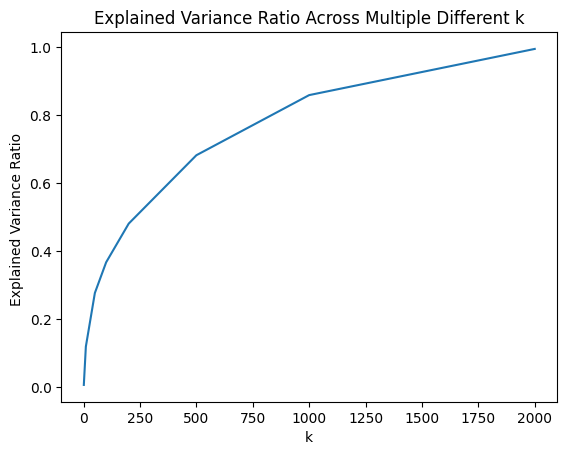

In [ ]:
# Define the number of components k
k=[1, 10, 50, 100, 200, 500, 1000, 2000]

# Create SVD object
from sklearn.decomposition import TruncatedSVD
variance_set = []
for x in k:
  svd = TruncatedSVD(n_components=x, n_iter=10, random_state=42)
  X_train_svd = svd.fit_transform(X_train_tfidf)
  X_test_svd = svd.transform(X_test_tfidf)
  variance_ratio = svd.explained_variance_ratio_.sum()
  variance_set.append(variance_ratio)

plt.plot(k,variance_set)

plt.title('Explained Variance Ratio Across Multiple Different k')
plt.xlabel('k')
plt.ylabel('Explained Variance Ratio ')


In [ ]:
# LSI model with k=50
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, n_iter=10, random_state=42)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

# inverse svd back to tfidf and compare with the original tfidf
X_train_svd_to_tfidf = svd.inverse_transform(X_train_svd)

from sklearn.metrics import mean_squared_error
lsi_mse = mean_squared_error(X_train_tfidf.toarray(), X_train_svd_to_tfidf)

print("MSE for LSI:", lsi_mse)

MSE for LSI: 5.348159866007923e-05


Non-negative Matrix Factorization (NMF)

In [ ]:
# initialize the model
from sklearn.decomposition import NMF
model = NMF(n_components=50, init='random', random_state=42)
W_train_nmf = model.fit_transform(X_train_tfidf)
W_test_nmf = model.transform(X_test_tfidf)
H = model.components_

# vector multiplication WH and compare with original tfidf
V_train_nmf = W_train_nmf @ H

from sklearn.metrics import mean_squared_error
nmf_mse = mean_squared_error(X_train_tfidf.toarray(), V_train_nmf)
print("MSE for NMF:", nmf_mse)

MSE for NMF: 5.4346560650741494e-05


##Q5  Classification Algorithms  
*   Comparing gamma=0.00001 and gamma=1000, the latter case performs better in all ressults. The case of gamma=100000 has a better performance than gamma=1000 in accuracy, precision, and f1-score.
*   The soft margin does not perform as expected. Looking at the confusion matrix, the second column equals to 0, meaning that no negative prediction.  The performance of an SVM is sensitive to its hyperparameters, such as the regularization parameter C. the C=0.00001 used here is too far away from the optimal C=100 we found later.
*   THe ROC reflects the performance of soft margin SVM. The ROC curve is created by plotting the true positive rate (Sensitivity) against the false positive rate (1 - Specificity) at various threshold settings.

In [ ]:
# labeling and training model
from sklearn.svm import SVC
# label convertion
Y_train_label= train["root_label"]
Y_test_label = test["root_label"]

#convert categorical label to 0 and 1.
Y_train_label[Y_train_label  == 'sports'] = 1
Y_train_label[Y_train_label  == 'climate'] = 0
Y_train_label= Y_train_label.astype(int)

Y_test_label[Y_test_label  == 'sports'] = 1
Y_test_label[Y_test_label  == 'climate'] = 0
Y_test_label = Y_test_label.astype(int)

# Create an SVC model
svm_1000 = SVC(C=1000, kernel='linear', probability=True)
svm_00001 = SVC(C=0.0001, kernel='linear', probability=True)
svm_100000 = SVC(C=100000, kernel='linear', probability=True)

# Train the model
svm_1000.fit(X_train_svd, Y_train_label)
svm_00001.fit(X_train_svd, Y_train_label)
svm_100000.fit(X_train_svd, Y_train_label)

# Make predictions on the test set
y_pred_1000 = svm_1000.predict(X_test_svd)
y_pred_00001 = svm_00001.predict(X_test_svd)
y_pred_100000 = svm_100000.predict(X_test_svd)

In [ ]:
# Evaluation function
from sklearn import metrics
import matplotlib.pyplot as plt
def eval_model(model, X_test_svd, Y_test_label, y_pred, roc_idx):
  #svc_disp = metrics.RocCurveDisplay.from_estimator(model, X_test_svd, Y_test_label) # ROC curve
  cm = metrics.confusion_matrix(Y_test_label, y_pred) # Confusion matrix
  acc = metrics.accuracy_score(Y_test_label, y_pred) # Accuracy
  recall = metrics.recall_score(Y_test_label, y_pred) # Recall
  precision = metrics.precision_score(Y_test_label, y_pred) # Precision
  f1 = metrics.f1_score(Y_test_label, y_pred) # F-1 score

  # AUC curve with more decimal digits
  if (roc_idx):
    y_pred_proba = model.predict_proba(X_test_svd)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_test_label,  y_pred_proba)
    auc = metrics.roc_auc_score(Y_test_label, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

  #plt.show()
  print(cm)
  print("Accuracy:", acc)
  print("Recall:", recall)
  print("Precision:", precision)
  print("F-1 score:", f1)


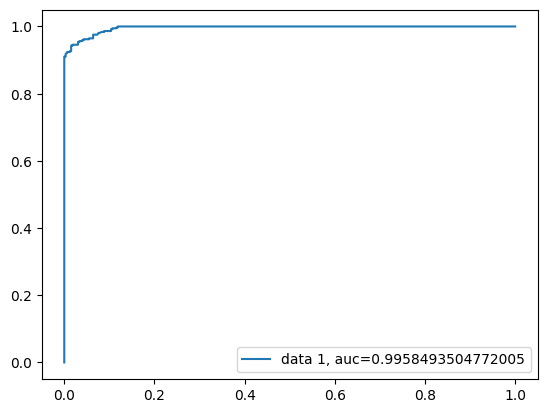

[[317  11]
 [ 17 351]]
Accuracy: 0.9597701149425287
Recall: 0.9538043478260869
Precision: 0.9696132596685083
F-1 score: 0.9616438356164384


In [ ]:
# gamma = 1000
eval_model(svm_1000, X_test_svd, Y_test_label, y_pred_1000, 1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


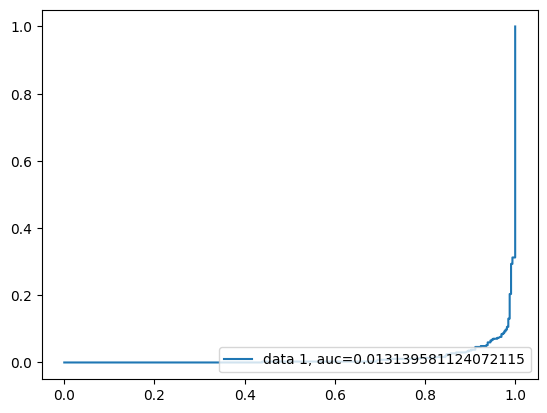

[[328   0]
 [368   0]]
Accuracy: 0.47126436781609193
Recall: 0.0
Precision: 0.0
F-1 score: 0.0


In [ ]:
# gamma = 0.00001
eval_model(svm_00001, X_test_svd, Y_test_label, y_pred_00001, 1)

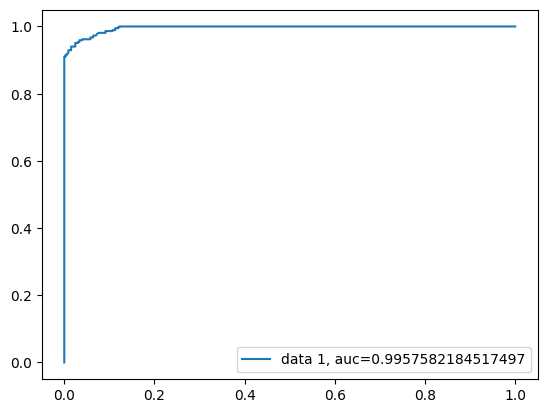

[[318  10]
 [ 17 351]]
Accuracy: 0.9612068965517241
Recall: 0.9538043478260869
Precision: 0.9722991689750693
F-1 score: 0.9629629629629629


In [ ]:
# gamma = 100000
eval_model(svm_100000, X_test_svd, Y_test_label, y_pred_100000, 1)

In [ ]:
# Gridsearch the optimal gamma
from sklearn.model_selection import GridSearchCV
parameters = {'C':[10**-3, 10**-2, 10**-1, 1, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]}
svm_opt = SVC (kernel='linear', probability=True)
grid_svm = GridSearchCV(svm_opt, parameters, cv=5, scoring='accuracy')
grid_svm.fit(X_train_svd, Y_train_label)

gamma_opt = grid_svm.best_params_['C']
print("optimal gamma :", gamma_opt )

optimal gamma : 100


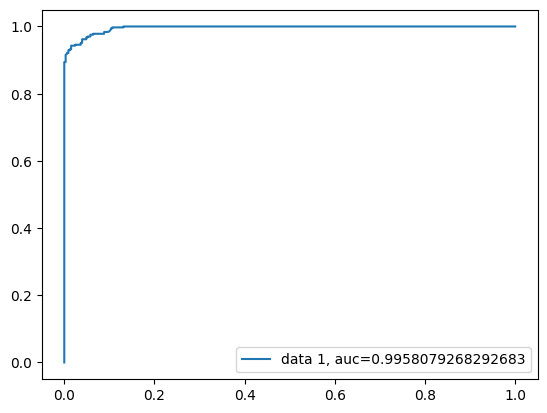

[[315  13]
 [ 17 351]]
Accuracy: 0.9568965517241379
Recall: 0.9538043478260869
Precision: 0.9642857142857143
F-1 score: 0.9590163934426229


In [ ]:
# opt_gamma = 100
svm_100 = SVC(C=100, kernel='linear', probability=True)
svm_100.fit(X_train_svd, Y_train_label)
y_pred_100 = svm_100.predict(X_test_svd)

eval_model(svm_100, X_test_svd, Y_test_label, y_pred_100, 1)

##Q6 Logistic Regression
(1)
*   The model becomes more restrictive as regularization strength increases, resulting in smaller learned coefficients and larger test errors
*   The L1 model tends to assign significant weights to many features. Coefficients can therefore take larger values. As L2 has high regulation encourages the model to use simpler coefficients, effectively shrinking less informative features towards zero.
*   L1 is useful for feature selection, especially when dealing with high-dimensional data where many features may be irrelevant. L2 is effective for handling multicollinearity among features by distributing weights more evenly.

(2)
*   Logistic Regression: The decision boundary is influenced by the probability estimates assigned to instances. It smoothly transitions across the boundary.
*   Linear SVM: The decision boundary is determined by the support vectors that lie closest to the decision boundary, and it focuses on maximizing the margin between classes.
*   Their performance is different because Losgistic output is directly interpretable as probabilities while SVM focus is on creating a margin between classes. It's the way they dealing with the data different. The performance difference can also depend on the specific characteristics of the dataset.
*   The statistically significance depends on the specific application as these two have their own specialties.

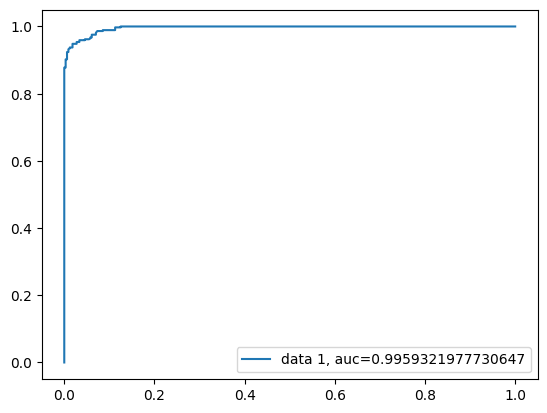

[[314  14]
 [ 15 353]]
Accuracy: 0.9583333333333334
Recall: 0.9592391304347826
Precision: 0.9618528610354223
F-1 score: 0.9605442176870749


In [ ]:
# non-regulated logistic
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty=None, max_iter=100000)

log_reg.fit(X_train_svd, Y_train_label)

y_pred_log = log_reg.predict(X_test_svd)

eval_model(log_reg, X_test_svd, Y_test_label, y_pred_log, 1)

In [ ]:
# Gridsearch the optimal regularization strength
from sklearn.model_selection import GridSearchCV
parameters = {'C':[10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10**1, 10**2, 10**3, 10**4, 10**5]}
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=100000)
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=100000)

grid_l1 = GridSearchCV(log_reg_l1, parameters, cv=5, scoring='accuracy')
grid_l2 = GridSearchCV(log_reg_l2, parameters, cv=5, scoring='accuracy')

grid_l1.fit(X_train_svd, Y_train_label)
grid_l2.fit(X_train_svd, Y_train_label)

L1_opt = grid_l1.best_params_['C']
L2_opt = grid_l2.best_params_['C']

print("optimal regularization strength for L1 :", L1_opt )
print("optimal regularization strength for L2 :", L2_opt )

optimal regularization strength for L1 : 100
optimal regularization strength for L2 : 10


In [ ]:
# L1 regulation c=100
log_reg_l1_opt = LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter=100000)
log_reg_l1_opt.fit(X_train_svd, Y_train_label)
y_pred_l1_opt = log_reg_l1_opt.predict(X_test_svd)

eval_model(log_reg_l1_opt, X_test_svd, Y_test_label, y_pred_l1_opt, 0)


[[315  13]
 [ 15 353]]
Accuracy: 0.9597701149425287
Recall: 0.9592391304347826
Precision: 0.9644808743169399
F-1 score: 0.9618528610354223


In [ ]:
# L2 regulation c=10
log_reg_l2_opt = LogisticRegression(C=10, penalty='l2', solver='liblinear', max_iter=100000)
log_reg_l2_opt.fit(X_train_svd, Y_train_label)
y_pred_l2_opt = log_reg_l2_opt.predict(X_test_svd)

eval_model(log_reg_l2_opt, X_test_svd, Y_test_label, y_pred_l2_opt, 0)

[[313  15]
 [ 14 354]]
Accuracy: 0.9583333333333334
Recall: 0.9619565217391305
Precision: 0.959349593495935
F-1 score: 0.960651289009498


##Q7 Naive Bayes Model
* The ROC curve, confusion matrix, accuracy, recall, precision, and F1-Score for the Guassian Naive Bayes model have been computed and displayed below.

NAIVE BAYES GAUSSIAN CLASSIFIER
----------------------------------------


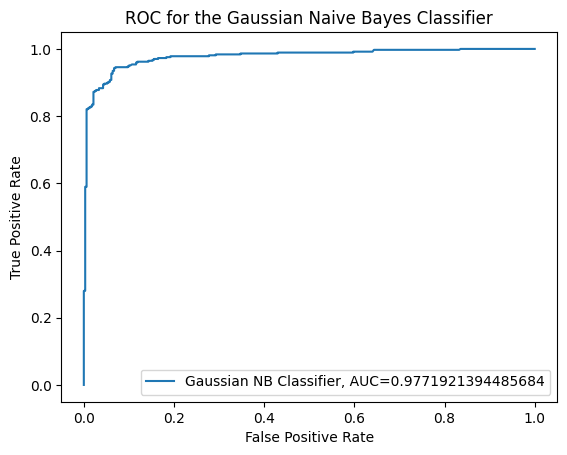

AUC is: 0.9771921394485684
----------------------------------------
Confusion Matrix:
[[277  51]
 [ 12 356]]
----------------------------------------
Accuracy: 0.9094827586206896
Recall: 0.967391304347826
Precision: 0.8746928746928747
F1-Score: 0.9187096774193548


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_prediction = nb_classifier.fit(X_train_svd, Y_train_label).predict(X_test_svd)

print("NAIVE BAYES GAUSSIAN CLASSIFIER")
print("-" * 40)

# Plotting the ROC Curve and Calculating AUC
y_pred_proba = nb_classifier.predict_proba(X_test_svd)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test_label, y_pred_proba)
auc_value = metrics.roc_auc_score(Y_test_label, y_pred_proba)
plt.plot(fpr, tpr, label="Gaussian NB Classifier, AUC="+str(auc_value))
plt.title('ROC for the Gaussian Naive Bayes Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
print("AUC is: " + str(auc_value))
print("-" * 40)
# Computing the Confusion Matrix
confusion_matrix = metrics.confusion_matrix(Y_test_label, nb_prediction)
print("Confusion Matrix:")
print(confusion_matrix)
print("-" * 40)
# Computing Accuracy, Recall, Precision, and F1-Score
accuracy = metrics.accuracy_score(Y_test_label, nb_prediction)
print("Accuracy:", accuracy)
recall = metrics.recall_score(Y_test_label, nb_prediction)
print("Recall:", recall)
precision = metrics.precision_score(Y_test_label, nb_prediction)
print("Precision:", precision)
f1 = metrics.f1_score(Y_test_label, nb_prediction)
print("F1-Score:", f1)

##Q8 Grid Search of Parameters
According to the 5-fold grid search cross validation, here are the best performing parameter combinations, along with their corresponding average accuracy measures:

1) Stemming, min_df = 5, NMF with 80 components, Logisitc Regression with L1 regularization and C=L1_opt=100 for a **mean_test_score of 0.960791** during grid search

2) Lemmatization, min_df = 5, LSI with 80 components, Logistic Regression with L2 regularization and C=L2_opt=10 for a **mean_test_score of 0.960432** during grid search

3) Lemmatization, min_df = 3, NMF with 80 components, SVM with gamma_opt=100 for a **mean_test_score of 0.960432** during grid search

4) Lemmatization, min_df = 3, LSI with 80 components, Logistic Regression with L2 regularization and C=L2_opt=10 for a **mean_test_score of 0.960072** during grid search

5) Lemmatization, min_df = 5, LSI with 80 components, SVM with gamma_opt=100 for a **mean_test_score of 0.960072** during grid search


Then, after evaluating each of these parameter combinations on the test set, we got the following results:

Test Accuracy of 1st Best Parameter Combination: 0.9540229885057471

Test Accuracy of 2nd Best Parameter Combination: 0.9568965517241379

Test Accuracy of 3rd Best Parameter Combination: 0.9612068965517241

Test Accuracy of 4th Best Parameter Combination: 0.9612068965517241

Test Accuracy of 5th Best Parameter Combination: 0.9698275862068966

In [ ]:
# Implementing Stemming Functionality
train_clean = train['full_text'].apply(clean)
test_clean = test['full_text'].apply(clean)

ps = nltk.stem.PorterStemmer()

from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()

def stem_doc(doc):
    return [" ".join([ps.stem(token) for token in nltk.word_tokenize(d)]) for d in doc]

train_clean_stem = stem_doc(train_clean)
test_clean_stem = stem_doc(test_clean)

train_clean_stem = pd.Series(train_clean_stem)
test_clean_stem = pd.Series(test_clean_stem)

# train_clean_lemm
# test_clean_lemm
# are also available, from earlier

In [ ]:
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory

cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=10)
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', None),
    ('clf', None),
],
memory=memory
)

# These are the classifiers that will be compared against each other
SVM_classifier = SVC(C=gamma_opt, kernel='linear')
logregl1_classifier = LogisticRegression(C=L1_opt, penalty='l1', solver='liblinear', max_iter=100000)
logregl2_classifier = LogisticRegression(C=L2_opt, penalty='l2', solver='liblinear', max_iter=100000)
NB_classifier = GaussianNB()

# Comprehensive list of paramaters that will be compared during the Grid Search
param_grid = [
    {
        "vect__min_df": [3, 5],
        'reduce_dim': [TruncatedSVD(n_iter=10, random_state=42), NMF(init='random', random_state=42)],
        'reduce_dim__n_components': [5, 30, 80],
        'clf': [SVM_classifier, logregl1_classifier, logregl2_classifier, NB_classifier]
    }
]



In [ ]:
# Run the actual grid search to find optimal paramters for lemmatization (warning: takes a LONG time to run (approx. 1-2 hours))
grid_search_lemm = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid_search_lemm.fit(train_clean_lemm, Y_train_label)
rmtree(cachedir)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(min_df=3, stop_words='english'), 1620    phoenix tv cbs since the writer and actor stri...
2779    people participate at a shakeout earthquake dr...
1376    gray news super bowl champion and former colt ...
1005    success an email have be send to with a link t...
620     nomination vote be from january with official ...
                              ...                        
1095    photo by justin casterline getty image oan s j...
1130    cookeville tenn wkrn the golden eagle will hav...
1294    fanduel sportsbook have launch an exclusive pr...
860     hunt story be a maine tradition just like the ...
3174    by lewis jackson sydney reuters thousand of pe...
Name: full_text, Length: 2224, dtype: object, 
1620    1
2779    0
1376    1
1005    1
620     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 5.1s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/bb700ccfd2b3652793623dd6340f616a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/4ebceb759c19487cbe53b1d69f23aafe
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2224x11604 sparse matrix of type '<class 'numpy.float64'>'
	with 328229 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 4.1s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/54dddadd8386f3400793ee00bd9ed329
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/09737ab47610451dc3b49c44900a0b1e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2224x8098 sparse matrix of type '<class 'numpy.float64'>'
	with 319851 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
284     1
1066    1
1191    1
1440    1
3251    0
Name: root_l

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 22.9s, 0.4min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/68da7840e8a738f359e2de8e31599c3e
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/85d0fc8d3421298e28f4cb213540b0ad
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2224x11690 sparse matrix of type '<class 'numpy.float64'>'
	with 331765 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 17.4s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/ec9e9a3b1c2302add0113ce6951171e1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/afefbe8d51954fc18338bbbce3130def
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2224x8088 sparse matrix of type '<class 'numpy.float64'>'
	with 315869 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_l

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 18.4s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/a6d8b6af4aee30c111a29c27bf42bce5
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/898b4b4ee6c0f937269f4ee9baf65539
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2224x8208 sparse matrix of type '<class 'numpy.float64'>'
	with 319915 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_l

In [ ]:
# Run the actual grid search to find optimal paramters for stemming (warning: takes a LONG time to run (approx. 1-2 hours))
grid_search_stem = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid_search_stem.fit(train_clean_stem, Y_train_label)
rmtree(cachedir)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(min_df=3, stop_words='english'), 556     phoenix tv cb sinc the writer and actor strike...
557     peopl particip at a shakeout earthquak drill a...
558     gray news super bowl champion and former colt ...
559     success an email ha been sent to with a link t...
560     nomin vote is from januari with offici oscar n...
                              ...                        
2775    photo by justin casterlin getti imag oan s jam...
2776    cookevil tenn wkrn the golden eagl will have a...
2777    fanduel sportsbook ha launch an exclus promo c...
2778    hunt stori are a main tradit just like the hun...
2779    by lewi jackson sydney reuter thousand of peop...
Length: 2224, dtype: object, 
1620    1
2779    0
1376    1
1005    1
620     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_label,

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 4.3s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/c89d1703c98bdac3b24ea398eab78373
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/32c8e3db044ab0916fd2b58d690eb497
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2224x10182 sparse matrix of type '<class 'numpy.float64'>'
	with 347050 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 4.7s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/ede0dde29f372cf6954eff3c582d47f5
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/9d90508e241dce2aedc80880c92bf5bb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2224x10051 sparse matrix of type '<class 'numpy.float64'>'
	with 346801 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
284     1
1066    1
1191    1
1440    1
3251    0
Name: root_

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 4.4s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/3f618310dc679b073bbe651ac6941fc9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/d542fa8e47a5b6585f9557202a5a98ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2224x7300 sparse matrix of type '<class 'numpy.float64'>'
	with 334590 stored elements in Compressed Sparse Row format>, 
1620    1
2779    0
1376    1
1005    1
620     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_l

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 4.8s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/86a67d09b71c440c68c4b286247ed673
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/93b1b3c58163c1cc50a794b726969fbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2224x7358 sparse matrix of type '<class 'numpy.float64'>'
	with 337446 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_l

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 20.4s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/9f8f13a23792c07321bf7c4749b71635
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/56ef8fe3efc88b8340a2bf25655bb523
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2224x10120 sparse matrix of type '<class 'numpy.float64'>'
	with 343324 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 20.6s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/032935fa8c4ad8411684c5fb3e1cc0df
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/b3f9923a515ff34dc8be4e39059bd898
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2224x10123 sparse matrix of type '<class 'numpy.float64'>'
	with 343052 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 20.8s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/c89d1703c98bdac3b24ea398eab78373
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/32c8e3db044ab0916fd2b58d690eb497
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2224x10182 sparse matrix of type '<class 'numpy.float64'>'
	with 347050 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 20.9s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/ede0dde29f372cf6954eff3c582d47f5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/9d90508e241dce2aedc80880c92bf5bb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2224x10051 sparse matrix of type '<class 'numpy.float64'>'
	with 346801 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
284     1
1066    1
1191    1
1440    1
3251    0
Name: root_

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 17.3s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/c0726738b4ae8a98647a8fef5406c556
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/de0795ab825a427161460dd94347a593
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2224x7235 sparse matrix of type '<class 'numpy.float64'>'
	with 333581 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_l

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 16.6s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/ae8c2a94bf2186efe65b48ab98038de6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/be5dc681e8b3f4bc4c62b51c124fe89d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2224x7214 sparse matrix of type '<class 'numpy.float64'>'
	with 333211 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_l

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 17.2s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/86a67d09b71c440c68c4b286247ed673
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/93b1b3c58163c1cc50a794b726969fbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2224x7358 sparse matrix of type '<class 'numpy.float64'>'
	with 337446 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
1095    1
1130    1
1294    1
860     1
3174    0
Name: root_l

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 16.8s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/8f0e666ccd864cfd9489f2ae2bd463b1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpow1z5j__/joblib/sklearn/pipeline/_fit_transform_one/04fbd2d5d6d9703d3f3be6d2986dc010
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2224x7251 sparse matrix of type '<class 'numpy.float64'>'
	with 337238 stored elements in Compressed Sparse Row format>, 
2677    0
1204    1
2955    0
2266    0
611     1
       ..
284     1
1066    1
1191    1
1440    1
3251    0
Name: root_l

In [ ]:
# Display Sorted Results for Lemmatization
display(grid_search_lemm.best_params_)

table_of_results_lemm = pd.DataFrame(grid_search_lemm.cv_results_)
table_of_results_lemm.sort_values(by='mean_test_score', ascending=False, inplace=True)
pd.DataFrame(table_of_results_lemm)

{'clf': SVC(C=100, kernel='linear'),
 'reduce_dim': NMF(init='random', n_components=80, random_state=42),
 'reduce_dim__n_components': 80,
 'vect__min_df': 3}

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_reduce_dim__n_components,param_vect__min_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,0.147844,0.008951,0.131595,0.004489,"LogisticRegression(C=10, max_iter=100000, solv...","TruncatedSVD(n_iter=10, random_state=42)",80,5,"{'clf': LogisticRegression(C=10, max_iter=1000...",0.960432,0.960432,0.956835,0.958633,0.965827,0.960432,0.003010,1
10,18.785252,3.189914,0.308804,0.071334,"SVC(C=100, kernel='linear')","NMF(init='random', n_components=80, random_sta...",80,3,"{'clf': SVC(C=100, kernel='linear'), 'reduce_d...",0.958633,0.964029,0.956835,0.953237,0.969424,0.960432,0.005688,1
28,0.178389,0.022868,0.184256,0.032755,"LogisticRegression(C=10, max_iter=100000, solv...","TruncatedSVD(n_iter=10, random_state=42)",80,3,"{'clf': LogisticRegression(C=10, max_iter=1000...",0.960432,0.960432,0.958633,0.958633,0.962230,0.960072,0.001346,3
5,1.025888,0.148323,0.151268,0.036526,"SVC(C=100, kernel='linear')","TruncatedSVD(n_iter=10, random_state=42)",80,5,"{'clf': SVC(C=100, kernel='linear'), 'reduce_d...",0.958633,0.962230,0.964029,0.953237,0.962230,0.960072,0.003841,4
17,0.232577,0.018484,0.127195,0.003043,"LogisticRegression(C=100, max_iter=100000, pen...","TruncatedSVD(n_iter=10, random_state=42)",80,5,"{'clf': LogisticRegression(C=100, max_iter=100...",0.958633,0.960432,0.960432,0.955036,0.960432,0.958993,0.002097,5
4,1.030678,0.029088,0.127692,0.006253,"SVC(C=100, kernel='linear')","TruncatedSVD(n_iter=10, random_state=42)",80,3,"{'clf': SVC(C=100, kernel='linear'), 'reduce_d...",0.960432,0.962230,0.962230,0.953237,0.955036,0.958633,0.003773,6
16,0.268253,0.050217,0.122109,0.004244,"LogisticRegression(C=100, max_iter=100000, pen...","TruncatedSVD(n_iter=10, random_state=42)",80,3,"{'clf': LogisticRegression(C=100, max_iter=100...",0.958633,0.956835,0.960432,0.956835,0.956835,0.957914,0.001439,7
23,0.139601,0.003238,0.213741,0.011665,"LogisticRegression(C=100, max_iter=100000, pen...","NMF(init='random', n_components=80, random_sta...",80,5,"{'clf': LogisticRegression(C=100, max_iter=100...",0.960432,0.960432,0.953237,0.949640,0.960432,0.956835,0.004550,8
22,0.145490,0.001547,0.234788,0.005641,"LogisticRegression(C=100, max_iter=100000, pen...","NMF(init='random', n_components=80, random_sta...",80,3,"{'clf': LogisticRegression(C=100, max_iter=100...",0.958633,0.949640,0.949640,0.958633,0.958633,0.955036,0.004406,9
34,0.140899,0.004997,0.241008,0.011226,"LogisticRegression(C=10, max_iter=100000, solv...","NMF(init='random', n_components=80, random_sta...",80,3,"{'clf': LogisticRegression(C=10, max_iter=1000...",0.949640,0.958633,0.956835,0.956835,0.947842,0.953957,0.004346,10


In [ ]:
# Display Sorted Results for Stemming
display(grid_search_stem.best_params_)

table_of_results_stem = pd.DataFrame(grid_search_stem.cv_results_)
table_of_results_stem.sort_values(by='mean_test_score', ascending=False, inplace=True)
pd.DataFrame(table_of_results_stem)

{'clf': LogisticRegression(C=100, max_iter=100000, penalty='l1', solver='liblinear'),
 'reduce_dim': NMF(init='random', n_components=80, random_state=42),
 'reduce_dim__n_components': 80,
 'vect__min_df': 5}

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_reduce_dim__n_components,param_vect__min_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,0.129608,0.003896,0.217574,0.007317,"LogisticRegression(C=100, max_iter=100000, pen...","NMF(init='random', n_components=80, random_sta...",80,5,"{'clf': LogisticRegression(C=100, max_iter=100...",0.960432,0.964029,0.960432,0.960432,0.958633,0.960791,0.001762,1
11,15.611570,3.026732,0.234493,0.006791,"SVC(C=100, kernel='linear')","NMF(init='random', n_components=80, random_sta...",80,5,"{'clf': SVC(C=100, kernel='linear'), 'reduce_d...",0.958633,0.965827,0.958633,0.953237,0.962230,0.959712,0.004195,2
29,0.138554,0.003039,0.122920,0.004072,"LogisticRegression(C=10, max_iter=100000, solv...","TruncatedSVD(n_iter=10, random_state=42)",80,5,"{'clf': LogisticRegression(C=10, max_iter=1000...",0.960432,0.960432,0.955036,0.955036,0.960432,0.958273,0.002643,3
16,0.207819,0.009409,0.133135,0.003350,"LogisticRegression(C=100, max_iter=100000, pen...","TruncatedSVD(n_iter=10, random_state=42)",80,3,"{'clf': LogisticRegression(C=100, max_iter=100...",0.958633,0.962230,0.960432,0.955036,0.953237,0.957914,0.003336,4
5,0.998612,0.226948,0.142742,0.031770,"SVC(C=100, kernel='linear')","TruncatedSVD(n_iter=10, random_state=42)",80,5,"{'clf': SVC(C=100, kernel='linear'), 'reduce_d...",0.956835,0.956835,0.962230,0.956835,0.956835,0.957914,0.002158,4
28,0.143077,0.005437,0.124292,0.003198,"LogisticRegression(C=10, max_iter=100000, solv...","TruncatedSVD(n_iter=10, random_state=42)",80,3,"{'clf': LogisticRegression(C=10, max_iter=1000...",0.960432,0.960432,0.956835,0.953237,0.958633,0.957914,0.002692,6
17,0.234155,0.030208,0.128620,0.005176,"LogisticRegression(C=100, max_iter=100000, pen...","TruncatedSVD(n_iter=10, random_state=42)",80,5,"{'clf': LogisticRegression(C=100, max_iter=100...",0.958633,0.958633,0.956835,0.956835,0.956835,0.957554,0.000881,7
4,0.955743,0.020517,0.126728,0.004936,"SVC(C=100, kernel='linear')","TruncatedSVD(n_iter=10, random_state=42)",80,3,"{'clf': SVC(C=100, kernel='linear'), 'reduce_d...",0.955036,0.958633,0.962230,0.953237,0.956835,0.957194,0.003094,8
22,0.159646,0.029562,0.307785,0.065442,"LogisticRegression(C=100, max_iter=100000, pen...","NMF(init='random', n_components=80, random_sta...",80,3,"{'clf': LogisticRegression(C=100, max_iter=100...",0.949640,0.958633,0.964029,0.955036,0.955036,0.956475,0.004745,9
10,19.490791,2.699319,0.249703,0.011425,"SVC(C=100, kernel='linear')","NMF(init='random', n_components=80, random_sta...",80,3,"{'clf': SVC(C=100, kernel='linear'), 'reduce_d...",0.949640,0.960432,0.958633,0.947842,0.958633,0.955036,0.005213,10


In [ ]:
from sklearn.pipeline import Pipeline
# Running the top 5 parameter combination pipelines on the test set and reporting performance
'''
According to the 5-fold grid search cross validation, here are the best performing parameter combinations, along with their corresponding average accuracy measures:

1) Stemming, min_df = 5, NMF with 80 components, Logisitc Regression with L1 regularization and C=L1_opt=100 for a mean_test_score of 0.960791

2) Lemmatization, min_df = 5, LSI with 80 components, Logistic Regression with L2 regularization and C=L2_opt=10 for a mean_test_score of 0.960432

3) Lemmatization, min_df = 3, NMF with 80 components, SVM with gamma_opt=100 for a mean_test_score of 0.960432

4) Lemmatization, min_df = 3, LSI with 80 components, Logistic Regression with L2 regularization and C=L2_opt=10 for a mean_test_score of 0.960072

5) Lemmatization, min_df = 5, LSI with 80 components, SVM with gamma_opt=100 for a mean_test_score of 0.960072
'''
gamma_opt = 100 # as computed earlier
L1_opt = 100 # as computed earlier
L2_opt = 10 # as computed earlier
pipeline1 = Pipeline([
    ('vect', CountVectorizer(min_df=5, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=80, init='random', random_state=42)),
    ('clf', LogisticRegression(C=L1_opt, penalty='l1', solver='liblinear', max_iter=100000)),
])

pipeline2 = Pipeline([
    ('vect', CountVectorizer(min_df=5, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=80, n_iter=10, random_state=42)),
    ('clf', LogisticRegression(C=L2_opt, penalty='l2', solver='liblinear', max_iter=100000)),
])

pipeline3 = Pipeline([
    ('vect', CountVectorizer(min_df=3, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=80, init='random', random_state=42)),
    ('clf', SVC(C=gamma_opt, kernel='linear')),
])

pipeline4 = Pipeline([
    ('vect', CountVectorizer(min_df=3, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=80, n_iter=10, random_state=42)),
    ('clf', LogisticRegression(C=L2_opt, penalty='l2', solver='liblinear', max_iter=100000)),
])

pipeline5 = Pipeline([
    ('vect', CountVectorizer(min_df=5, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=80, n_iter=10, random_state=42)),
    ('clf', SVC(C=gamma_opt, kernel='linear')),
])

# Train and evaluate accuracy on test set
pipeline1.fit(train_clean_stem, Y_train_label)
predict1 = pipeline1.predict(test_clean_stem)
print("Test Accuracy of 1st Best Parameter Combo:", metrics.accuracy_score(Y_test_label, predict1))

pipeline2.fit(train_clean_lemm, Y_train_label)
predict2 = pipeline2.predict(test_clean_lemm)
print("Test Accuracy of 2nd Best Parameter Combo:", metrics.accuracy_score(Y_test_label, predict2))

pipeline3.fit(train_clean_lemm, Y_train_label)
predict3 = pipeline3.predict(test_clean_lemm)
print("Test Accuracy of 3rd Best Parameter Combo:", metrics.accuracy_score(Y_test_label, predict3))

pipeline4.fit(train_clean_lemm, Y_train_label)
predict4 = pipeline4.predict(test_clean_lemm)
print("Test Accuracy of 4th Best Parameter Combo:", metrics.accuracy_score(Y_test_label, predict4))

pipeline5.fit(train_clean_lemm, Y_train_label)
predict5 = pipeline5.predict(test_clean_lemm)
print("Test Accuracy of 5th Best Parameter Combo:", metrics.accuracy_score(Y_test_label, predict5))

Test Accuracy of 1st Best Parameter Combo: 0.9540229885057471
Test Accuracy of 2nd Best Parameter Combo: 0.9568965517241379
Test Accuracy of 3rd Best Parameter Combo: 0.9612068965517241
Test Accuracy of 4th Best Parameter Combo: 0.9612068965517241
Test Accuracy of 5th Best Parameter Combo: 0.9698275862068966


# Q9 Multiclass Classification

* The confusion matrix, accuracy, recall, precision, and F1-score for the Naive Bayes Gaussian, OneVsOne SVM, and OneVsRest SVM classifiers are computed and reported below.
* To deal with class imbalanes, we were able to import SMOTE in order to oversample datapoints that were underrepresented in order to match the frequency of more popular labels.
* The confusion matrix is structured in such a way that has predicted classifications on the x-axis and true classifications on the y-axis. Therefore, if our classifier is doing a good job, then we should expect the diagonal going from the top-left-hand corner to the bottom-right-hand corner to be to be filled with greater counts compared to all other entries in the matrix. The confusion matrix allows us to easily detect where our model is running into confusions. For instance, if the distribution of predicted classifications for a given label is split between a given set of classes, we see that the model is having a hard time distinguishing between examples corresponding to that set of classes.
* All classifiers did a reasonably good job, and thus we observed distinct visible blocks on the major diagonal for the most part. The issue was with the 'heatwave' and 'forest fire' classes, which often got confused with each other.
* The 'heatwave' and 'forest fire' labels were merged into one larger label. We did this by labeling every instance of 'heatwave' as 'forest fire', which reduced the total number of labels from 10 to 9. Afterwards, the performance was evaluated again, and there was a significant boost in the accuracy of the model for both OneVsOne SVM and OneVsRest SVM (in both cases, a jump from roughly 80 percent to roughly 90 percent accuracy).
* This newly introduced imbalance did not have much of an impact on the effectiveness of the two multiclass SVM classifiers. To verify this, we used SMOTE to oversample underrepresented datapoints and then retrained the models using this modified version of the training data. For both types of SVM models, this had very little effect on the metrics we measured: accuracy, recall, precision, f1-score. These computations have been printed below.

In [ ]:
print("Leaf labels:", list(set(df["leaf_label"])))
classes = ['basketball', 'baseball', 'tennis', 'football', 'soccer', 'forest fire', 'flood', 'earthquake', 'drought', 'heatwave']

# Clean and process the multiclass data using Lemmatization and LSI
mc_train, mc_test = train_test_split(df[["full_text","leaf_label"]], test_size=0.2)
mc_train_clean = mc_train["full_text"].apply(clean)
mc_test_clean = mc_test["full_text"].apply(clean)
mc_train_clean_lemm = mc_train_clean.apply(lemmatize_sentence)
mc_test_clean_lemm = mc_test_clean.apply(lemmatize_sentence)
vectorizer = CountVectorizer(min_df=3, stop_words='english')
mc_X_train = vectorizer.fit_transform(mc_train_clean_lemm)
mc_X_test = vectorizer.transform(mc_test_clean_lemm)
print(mc_X_train.shape)
print(mc_X_test.shape)
tfidf = TfidfTransformer()
mc_X_train_tfidf = tfidf.fit_transform(mc_X_train)
mc_X_test_tfidf = tfidf.transform(mc_X_test)
print(mc_X_train_tfidf.shape)
print(mc_X_test_tfidf.shape)
svd = TruncatedSVD(n_components=50, n_iter=10, random_state=42)
mc_X_train_svd = svd.fit_transform(mc_X_train_tfidf)
mc_X_test_svd = svd.transform(mc_X_test_tfidf)
print(mc_X_train_svd.shape)
print(mc_X_test_svd.shape)

Leaf labels: ['football', 'forest fire', 'baseball', 'basketball', 'soccer', 'earthquake', 'drought', 'flood', 'heatwave', 'tennis']
(2780, 13254)
(696, 13254)
(2780, 13254)
(696, 13254)


In [ ]:
# Convert categorical label to numerical labels (between 0 and 9)
mc_Y_train_label= mc_train["leaf_label"]
mc_Y_test_label = mc_test["leaf_label"]
for i in range(len(classes)):
  mc_Y_train_label[mc_Y_train_label  == classes[i]] = i
  mc_Y_test_label[mc_Y_test_label  == classes[i]] = i
mc_Y_train_label = mc_Y_train_label.astype(int)
mc_Y_test_label = mc_Y_test_label.astype(int)

In [ ]:
# Multiclass Naive Bayes Gaussian Classifier

print("MULTICLASS NAIVE BAYES GAUSSIAN CLASSIFIER")
print("-" * 40)

mc_nb_classifier = GaussianNB()
mc_nb_prediction = mc_nb_classifier.fit(mc_X_train_svd, mc_Y_train_label).predict(mc_X_test_svd)
confusion_matrix = metrics.confusion_matrix(mc_Y_test_label, mc_nb_prediction)
print("Confusion Matrix:")
print(confusion_matrix)
print("-" * 40)
accuracy = metrics.accuracy_score(mc_Y_test_label, mc_nb_prediction)
print("Accuracy:", accuracy)
recall = metrics.recall_score(mc_Y_test_label, mc_nb_prediction, average='macro')
print("Recall:", recall)
precision = metrics.precision_score(mc_Y_test_label, mc_nb_prediction, average='macro')
print("Precision:", precision)
f1 = metrics.f1_score(mc_Y_test_label, mc_nb_prediction, average='macro')
print("F1-Score:", f1)


MULTICLASS NAIVE BAYES GAUSSIAN CLASSIFIER
----------------------------------------
Confusion Matrix:
[[63  3  0  3  0  0  0  0  0  0]
 [ 0 56  1  2  2  0  0  0  0  1]
 [ 0 21 48  0  2  0  1  0  1  0]
 [ 2  5  0 62  3  0  0  0  0  0]
 [ 0  2  1  0 64  0  0  0  0  0]
 [ 0 12  1  0  1  4  1  0 22 30]
 [ 0  5  0  0  0  0 74  0  1  2]
 [ 0  9  4  0  0  0  0 60  0  0]
 [ 0  3  1  0  0  0  0  0 58  0]
 [ 0 12  3  0  0 14  4  0 15 17]]
----------------------------------------
Accuracy: 0.7270114942528736
Recall: 0.726785571628059
Precision: 0.7119712481034034
F1-Score: 0.7000930008035189


In [ ]:
# SVM Classifier One Vs One

print("MULTICLASS ONE VS ONE SVM CLASSIFIER")
print("-" * 40)

# Train the OneVsOneClassifier
from sklearn.multiclass import OneVsOneClassifier
mc_svm_oo = SVC(C=100, kernel='linear', probability=True)
mc_svm_oo = OneVsOneClassifier(mc_svm_oo)
mc_svm_oo_prediction = mc_svm_oo.fit(mc_X_train_svd, mc_Y_train_label).predict(mc_X_test_svd)

# Calculate and print metrics
confusion_matrix = metrics.confusion_matrix(mc_Y_test_label, mc_svm_oo_prediction)
print("Confusion Matrix:")
print(confusion_matrix)
print("-" * 40)
accuracy = metrics.accuracy_score(mc_Y_test_label, mc_svm_oo_prediction)
print("Accuracy:", accuracy)
recall = metrics.recall_score(mc_Y_test_label, mc_svm_oo_prediction, average='macro')
print("Recall:", recall)
precision = metrics.precision_score(mc_Y_test_label, mc_svm_oo_prediction, average='macro')
print("Precision:", precision)
f1 = metrics.f1_score(mc_Y_test_label, mc_svm_oo_prediction, average='macro')
print("F1-Score:", f1)

MULTICLASS ONE VS ONE SVM CLASSIFIER
----------------------------------------
Confusion Matrix:
[[68  0  0  1  0  0  0  0  0  0]
 [ 0 57  1  2  1  1  0  0  0  0]
 [ 0  4 63  0  2  1  0  0  0  3]
 [ 1  3  0 67  1  0  0  0  0  0]
 [ 0  0  0  0 67  0  0  0  0  0]
 [ 0  2  1  0  1 14  1  1  1 50]
 [ 0  1  0  0  1  3 75  1  0  1]
 [ 0  4  0  0  0  2  0 67  0  0]
 [ 0  2  0  0  0  2  0  0 56  2]
 [ 0  2  4  0  0 32  2  2  1 22]]
----------------------------------------
Accuracy: 0.7988505747126436
Recall: 0.7969744148296428
Precision: 0.7940816212304116
F1-Score: 0.7937056226137214


In [ ]:
# SVM Classifier for One Vs Rest

print("MULTICLASS ONE VS REST SVM CLASSIFIER")
print("-" * 40)

# Train the OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier
mc_svm_or = SVC(C=100, kernel='linear', probability=True)
mc_svm_or = OneVsRestClassifier(mc_svm_or)
mc_svm_or_prediction = mc_svm_or.fit(mc_X_train_svd, mc_Y_train_label).predict(mc_X_test_svd)

# Calculate and print metrics
confusion_matrix = metrics.confusion_matrix(mc_Y_test_label, mc_svm_or_prediction)
print("Confusion Matrix:")
print(confusion_matrix)
print("-" * 40)
accuracy = metrics.accuracy_score(mc_Y_test_label, mc_svm_or_prediction)
print("Accuracy:", accuracy)
recall = metrics.recall_score(mc_Y_test_label, mc_svm_or_prediction, average='macro')
print("Recall:", recall)
precision = metrics.precision_score(mc_Y_test_label, mc_svm_or_prediction, average='macro')
print("Precision:", precision)
f1 = metrics.f1_score(mc_Y_test_label, mc_svm_or_prediction, average='macro')
print("F1-Score:", f1)

MULTICLASS ONE VS REST SVM CLASSIFIER
----------------------------------------
Confusion Matrix:
[[68  0  0  1  0  0  0  0  0  0]
 [ 0 59  0  1  1  1  0  0  0  0]
 [ 0  7 59  0  2  1  1  0  1  2]
 [ 1  0  0 70  0  0  0  0  0  1]
 [ 0  0  0  0 67  0  0  0  0  0]
 [ 0  3  3  0  2  9  1  0  7 46]
 [ 0  1  1  0  1  2 74  1  2  0]
 [ 1  0  1  0  1  1  1 65  0  3]
 [ 0  1  2  0  0  0  0  0 59  0]
 [ 0  4  5  0  0 17  3  2  3 31]]
----------------------------------------
Accuracy: 0.8060344827586207
Recall: 0.806570807673055
Precision: 0.7830852135150221
F1-Score: 0.7893304995991937


In [ ]:
# Creating a subset
# Let's merge the following classes together into one label: 'heatwave' (corresponding to class 9) and 'forest fire' (corresponding to class 5)

mc_Y_train_merged_label = mc_Y_train_label
mc_Y_test_merged_label = mc_Y_test_label
mc_Y_train_merged_label[mc_Y_train_merged_label  == 9] = 5
mc_Y_test_merged_label[mc_Y_test_merged_label  == 9] = 5

In [ ]:
# SVM Classifier One Vs One Using New Subset

print("MULTICLASS ONE VS ONE SVM CLASSIFIER USING NEW SUBSET")
print("-" * 40)

# Train the OneVsOneClassifier
from sklearn.multiclass import OneVsOneClassifier
mc_svm_oo_subset = SVC(C=100, kernel='linear', probability=True)
mc_svm_oo_subset = OneVsOneClassifier(mc_svm_oo_subset)
mc_svm_oo_subset_prediction = mc_svm_oo_subset.fit(mc_X_train_svd, mc_Y_train_merged_label).predict(mc_X_test_svd)

# Calculate and print metrics
confusion_matrix = metrics.confusion_matrix(mc_Y_test_merged_label, mc_svm_oo_subset_prediction)
print("Confusion Matrix:")
print(confusion_matrix)
print("-" * 40)
accuracy = metrics.accuracy_score(mc_Y_test_merged_label, mc_svm_oo_subset_prediction)
print("Accuracy:", accuracy)
recall = metrics.recall_score(mc_Y_test_merged_label, mc_svm_oo_subset_prediction, average='macro')
print("Recall:", recall)
precision = metrics.precision_score(mc_Y_test_merged_label, mc_svm_oo_subset_prediction, average='macro')
print("Precision:", precision)
f1 = metrics.f1_score(mc_Y_test_merged_label, mc_svm_oo_subset_prediction, average='macro')
print("F1-Score:", f1)

MULTICLASS ONE VS ONE SVM CLASSIFIER USING SUBSET
----------------------------------------
Confusion Matrix:
[[ 68   0   0   1   0   0   0   0   0]
 [  0  56   1   2   1   2   0   0   0]
 [  0   3  61   0   2   7   0   0   0]
 [  1   2   0  67   1   1   0   0   0]
 [  0   0   0   0  67   0   0   0   0]
 [  0   0   3   0   0 129   2   0   2]
 [  0   1   0   0   1   5  75   0   0]
 [  0   1   0   0   0   7   0  65   0]
 [  0   1   0   0   0   6   0   0  55]]
----------------------------------------
Accuracy: 0.9238505747126436
Recall: 0.9217307042159969
Precision: 0.9385846114688784
F1-Score: 0.9284984322218245


In [ ]:
# SVM Classifier One Vs Rest Using New Subset

print("MULTICLASS ONE VS REST SVM CLASSIFIER USING NEW SUBSET")
print("-" * 40)

# Train the OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier
mc_svm_or_subset = SVC(C=100, kernel='linear', probability=True)
mc_svm_or_subset = OneVsRestClassifier(mc_svm_or_subset)
mc_svm_or_subset_prediction = mc_svm_or_subset.fit(mc_X_train_svd, mc_Y_train_merged_label).predict(mc_X_test_svd)

# Calculate and print metrics
confusion_matrix = metrics.confusion_matrix(mc_Y_test_merged_label, mc_svm_or_subset_prediction)
print("Confusion Matrix:")
print(confusion_matrix)
print("-" * 40)
accuracy = metrics.accuracy_score(mc_Y_test_merged_label, mc_svm_or_subset_prediction)
print("Accuracy:", accuracy)
recall = metrics.recall_score(mc_Y_test_merged_label, mc_svm_or_subset_prediction, average='macro')
print("Recall:", recall)
precision = metrics.precision_score(mc_Y_test_merged_label, mc_svm_or_subset_prediction, average='macro')
print("Precision:", precision)
f1 = metrics.f1_score(mc_Y_test_merged_label, mc_svm_or_subset_prediction, average='macro')
print("F1-Score:", f1)

MULTICLASS ONE VS REST SVM CLASSIFIER USING SUBSET
----------------------------------------
Confusion Matrix:
[[ 68   0   0   1   0   0   0   0   0]
 [  0  58   0   1   1   2   0   0   0]
 [  0   7  59   0   2   4   0   0   1]
 [  1   0   0  70   0   0   0   1   0]
 [  0   0   0   0  67   0   0   0   0]
 [  0   4   5   0   1 119   3   0   4]
 [  0   1   1   0   1   3  74   1   1]
 [  1   1   1   0   1   3   1  65   0]
 [  0   1   2   0   0   3   0   0  56]]
----------------------------------------
Accuracy: 0.9137931034482759
Recall: 0.9191675897105481
Precision: 0.9160904819557114
F1-Score: 0.916512459607979


In [ ]:
# Balancing the classes

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
mc_X_train_svd_balanced, mc_Y_train_merged_label_balanced = oversample.fit_resample(mc_X_train_svd, mc_Y_train_merged_label)

print(len(mc_X_train_svd))
print(len(mc_Y_train_merged_label))
print(len(mc_X_train_svd_balanced))
print(len(mc_Y_train_merged_label_balanced))

2780
2780
5076
5076


In [ ]:
print("MULTICLASS ONE VS ONE SVM CLASSIFIER USING NEW SUBSET - BALANCED")
print("-" * 40)

# Train the OneVsOneClassifier
from sklearn.multiclass import OneVsOneClassifier
mc_svm_oo_subset_balanced = SVC(C=100, kernel='linear', probability=True)
mc_svm_oo_subset_balanced = OneVsOneClassifier(mc_svm_oo_subset_balanced)
mc_svm_oo_subset_balanced_prediction = mc_svm_oo_subset_balanced.fit(mc_X_train_svd_balanced, mc_Y_train_merged_label_balanced).predict(mc_X_test_svd)

# Calculate and print metrics
confusion_matrix = metrics.confusion_matrix(mc_Y_test_merged_label, mc_svm_oo_subset_balanced_prediction)
print("Confusion Matrix:")
print(confusion_matrix)
print("-" * 40)
accuracy = metrics.accuracy_score(mc_Y_test_merged_label, mc_svm_oo_subset_balanced_prediction)
print("Accuracy:", accuracy)
recall = metrics.recall_score(mc_Y_test_merged_label, mc_svm_oo_subset_balanced_prediction, average='macro')
print("Recall:", recall)
precision = metrics.precision_score(mc_Y_test_merged_label, mc_svm_oo_subset_balanced_prediction, average='macro')
print("Precision:", precision)
f1 = metrics.f1_score(mc_Y_test_merged_label, mc_svm_oo_subset_balanced_prediction, average='macro')
print("F1-Score:", f1)

MULTICLASS ONE VS ONE SVM CLASSIFIER USING SUBSET - BALANCED
----------------------------------------
Confusion Matrix:
[[ 68   0   0   1   0   0   0   0   0]
 [  0  56   1   2   1   2   0   0   0]
 [  0   3  62   3   2   3   0   0   0]
 [  1   1   0  68   1   1   0   0   0]
 [  0   0   0   0  67   0   0   0   0]
 [  0   4   5   0   1 120   3   1   2]
 [  0   2   0   0   1   5  74   0   0]
 [  0   2   0   0   1   3   0  67   0]
 [  0   2   0   0   0   3   0   1  56]]
----------------------------------------
Accuracy: 0.9166666666666666
Recall: 0.9209242841069365
Precision: 0.9216754867238343
F1-Score: 0.9202466636185971


In [ ]:
print("MULTICLASS ONE VS REST SVM CLASSIFIER USING NEW SUBSET - BALANCED")
print("-" * 40)

# Train the OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier
mc_svm_or_subset_balanced = SVC(C=100, kernel='linear', probability=True)
mc_svm_or_subset_balanced = OneVsRestClassifier(mc_svm_or_subset_balanced)
mc_svm_or_subset_balanced_prediction = mc_svm_or_subset_balanced.fit(mc_X_train_svd_balanced, mc_Y_train_merged_label_balanced).predict(mc_X_test_svd)

# Calculate and print metrics
confusion_matrix = metrics.confusion_matrix(mc_Y_test_merged_label, mc_svm_or_subset_balanced_prediction)
print("Confusion Matrix:")
print(confusion_matrix)
print("-" * 40)
accuracy = metrics.accuracy_score(mc_Y_test_merged_label, mc_svm_or_subset_balanced_prediction)
print("Accuracy:", accuracy)
recall = metrics.recall_score(mc_Y_test_merged_label, mc_svm_or_subset_balanced_prediction, average='macro')
print("Recall:", recall)
precision = metrics.precision_score(mc_Y_test_merged_label, mc_svm_or_subset_balanced_prediction, average='macro')
print("Precision:", precision)
f1 = metrics.f1_score(mc_Y_test_merged_label, mc_svm_or_subset_balanced_prediction, average='macro')
print("F1-Score:", f1)

MULTICLASS ONE VS REST SVM CLASSIFIER USING SUBSET - BALANCED
----------------------------------------
Confusion Matrix:
[[ 68   0   0   1   0   0   0   0   0]
 [  0  57   2   1   1   0   1   0   0]
 [  0   3  63   1   3   3   0   0   0]
 [  1   0   0  70   0   0   0   1   0]
 [  0   0   0   0  67   0   0   0   0]
 [  0   6   8   0   1 112   3   1   5]
 [  0   1   1   0   1   3  74   1   1]
 [  1   0   2   0   1   1   1  66   1]
 [  0   1   2   0   0   1   0   0  58]]
----------------------------------------
Accuracy: 0.9123563218390804
Recall: 0.922851100233626
Precision: 0.9111708126404364
F1-Score: 0.9158741367174122
